<a href="https://colab.research.google.com/github/majaszymajda/projektowanie_algorytm/blob/main/ProjektowanieAlgorytmow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Grafy

## Zadanie 1

Algorytm Fruchterman Reingold działa w opaciu o model sił fizycznych, których wszytskie wierzchołki wzajemnie sie odpychają a krawędzie powoduja przyciąganie połączonych nimi wierzchołków - działaja jak sprężyny.
Algorytm działa nastepujaco:
1.   W zadanej liczbie iteracji liczy cłkowita energię układu, czyli wypadkowej poszczególnych sił
2.   Na tej podstawie wyznacza nowe położenie wierzchołków, dążąc do równowagi = minimaizacji energii
3. Temperatura - sumulowane wyszarzanie dzięki ktremu udaje sie pokonać lokalne minimum, po każdej iteracji temperatura maleje, przec co zmniejszają się siły działające na poszczególne wierzchołki
4. Gdy tempertatura spada poniżej określonej wartości, algorytm zaprzestaje działania

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph() #This class implements an undirected graph. It ignores multiple edges between two nodes. It does allow self-loop edges between a node and itself.
G.add_edge('A', 'B', weight=4)
G.add_edge('B', 'D', weight=2)
G.add_edge('A', 'C', weight=3)
G.add_edge('C', 'D', weight=4)

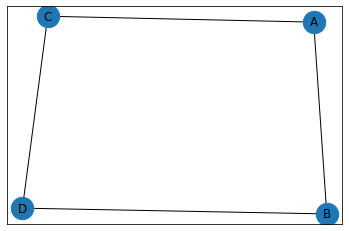

In [ ]:
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=500) #węzeł
nx.draw_networkx_labels(G, pos) #etykieta 
nx.draw_networkx_edges(G, pos) #krawędzie

plt.show()

Draw the graph as a simple representation with no node labels or edge labels and using the full Matplotlib figure area and no axis labels by default. 

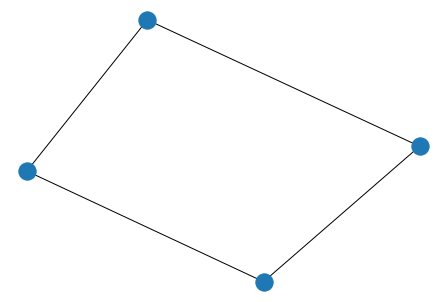

In [ ]:
nx.draw(G) 

plt.show()

nx.Graph() - this class implements an undirected graph. It ignores multiple edges between two nodes. It does allow self-loop edges between a node and itself <br>
weight - <br>
spring_layout() - algorytm Fruchterman Reingold służy do wizualizacji grafów tak aby wierzchołki były rozłożone równomiernie a krawiędzia miały względnie tę sama długość i w miarę możliwości nie przecinały się. 



## Zadanie 2

{1: [0, 0], 2: [1, 1], 3: [2, 0], 4: [3, -1], 5: [4, 0]}


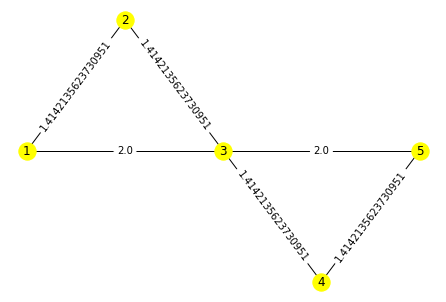

In [ ]:
import numpy as np

VV = [1, 2, 3, 4, 5]
WW = [(1, 2), (2, 3), (3, 4), (4, 5), (1, 3), (3, 5)]
Vx = {1:0, 2:1, 3:2, 4:3, 5:4}
Vy = {1:0, 2:1, 3:0, 4:-1, 5:0}
g = nx.Graph();
gpos = {};
for v in VV:
  g.add_node(v);
  gpos[v] = [Vx[v], Vy[v]]

print(gpos)

for v1 in VV:
  for v2 in VV:
    if (v1, v2) in WW:
      label = str(np.sqrt((Vx[v1] - Vx[v2])**2 + (Vy[v1] - Vy[v2])**2))
      g.add_weighted_edges_from([(v1, v2, label)])

nx.draw(g, gpos, with_labels=True, node_color='yellow')
labels = nx.get_edge_attributes(g, 'weight')
nx.draw_networkx_edge_labels(g, gpos, edge_labels=labels)
plt.show()

## Zadanie 3
Napisz program wyświetlający graf pełny o parametrach: liczba wierzchołków zadana parametrycznie (jako
stała w programie), wierzchołki rozmieszczone na okręgu, w równych odstępach, etykiety wierzchołkow są
kolejnymi liczbami naturalnymi.

Podaj liczbę wierzchołków:15


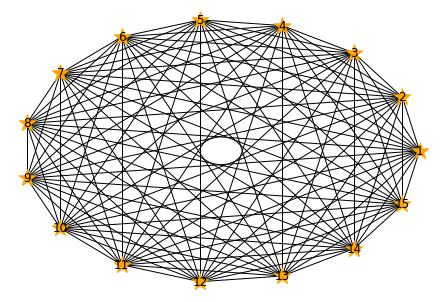

In [ ]:
G = nx.Graph()
node_qty = int(input('Podaj liczbę wierzchołków:'))

nodes = [i + 1 for i in range (0, node_qty)]

for n in nodes:
  G.add_node(n)

for n1 in nodes:
  for n2 in nodes:
    G.add_edge(n1, n2)

# pos = nx.spring_layout(G)
pos = nx.circular_layout(G)

nx.draw(G, pos, with_labels=True, node_color='orange', node_shape='*') 

plt.show()


## Zadanie 4
Napisz program losujący graf o parametrycznie zadanej liczbie wierzchołków. Wierzchołki są rozmieszczone
w losowych punktach (całego obszaru grafu) ale tak, żeby na siebie nie zachodziły. Wierzchołki dodawaj
do grafu pojedynczo, jeśli wylosowany wierzchołek zachodzi na inny, to wylosuj nową pozycję dodawanego
(powtarzaj tyle razy, aż nie będzie kolizji). Przerwij działanie programu, jeśli nie udało się wygenerować
grafu po 100 nieudanych próbach dodania wierzchołka.


Podaj liczbę wierzchołków:15
Graf dla 15 wierzchołków z krawędziami


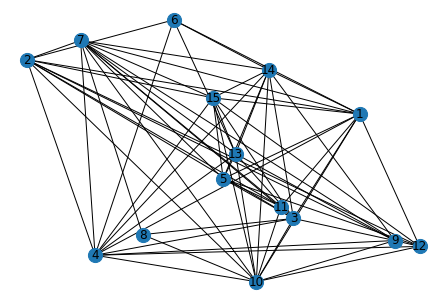

In [ ]:
import random

nodes_qty = int(input('Podaj liczbę wierzchołków:'))
nodes = [i + 1 for i in range(0, nodes_qty)]

G = nx.Graph()

pos = {}

def gen():
    x1 = random.randint(-100, 100)
    x2 = random.randint(-100, 100)
    return x1, x2

def check(x1, x2, pos):
    dis = 4
    y = False
    for c in pos:
        if x1 - dis < pos[c][0] < x1 + dis or x2 - dis < pos[c][1] < x2 + dis:
            y = True
    return y

for n in nodes:
    iter = 0
    x1, x2 = gen()
    y = check(x1, x2, pos)
    if y == True:
        while y == True and iter <= 100:
            x1, x2 = gen()
            y = check(x1, x2, pos)
            iter += 1
        if y == False:
            pos[n] = [x1, x2]
        else:
            print(f'Niestety nie udało się wylosować położenia dla {n} węzła tak aby nie nachodził na inne w mniej niż 100 iteracjach')
            break
    else:
        pos[n] = [x1, x2]

if nodes_qty == len(pos):
  for n in nodes:
      G.add_node(n)
      edge_qty = random.choice(nodes)
      for q in range(0, edge_qty):
        edge = random.choice(nodes)
        G.add_edge(n, edge)
  print(f'Graf dla {n} wierzchołków z krawędziami')

else:
  for n in pos.keys():
      G.add_node(n)
  print(f'Graf dla {n} wierzchołków bez krawędzi')


nx.draw(G, pos, with_labels=True, node_size=200)
plt.show()


#Lista 2

## Zadanie 1 

1. zaimplementuj (rekurenycjny) algorytm wyliczający wartość n-tego elementu ciągu,
2. analitycznie wyznacz wzór na wartość ntego elementu ciągu (indukcja),
3. napisz procedurę weryfikującą poprawność zaimplementowanej rekurencj i(wyświetlającą i porównującą wynik numeryczny i analityczny) dla N pierwszych elementów ciągu.

a) x(n) = 3^n + x(n-1)

In [ ]:
n = 5

def seq1(n):
  if n == 0:
    return 0
  return 3**n + seq1(n-1)

def ind1(n):
  return ((3**(n+1)-1)/(3-1))-1

seq = seq1(n)
ind = ind1(n)

if seq == ind:
  print('Rozwiązania są równe')
else:
  print(abs(seq-ind))

Rozwiązania są równe


b) x(n) = n + x(n-2)

In [ ]:
def seq2(n):
  if n == 0 or n == -1:
    return 0
  return n + seq2(n-2)

def ind2(n):
  if n % 2 == 0:
    return 0.5 * n * 0.5 * (n+2)
  else:
    return (0.5 * (n+1))**2

seq = seq2(n)
ind = ind2(n)

if seq == ind:
  print('Rozwiązania są równe')
else:
  print(abs(seq-ind))

Rozwiązania są równe


c) x(n) = x(n-1) + x(n-2)

In [ ]:
from math import sqrt

def seq3(n):
  if n < 2:
    return n
  return seq3(n-1) + seq3(n-2)

def ind3(n):
  return ((1/sqrt(5)) * ((1+sqrt(5))/2)**n) - ((1/sqrt(5)) * ((1-sqrt(5))/2)**n)

seq = seq3(n)
ind = ind3(n)
ind = round(ind3(n), 14)

if seq == ind:
  print('Rozwiązania są równe')
else:
  print(abs(seq-ind))

Rozwiązania są równe


## Zadanie 2

Dany jest graf nieskierowany V = (V,E), gdzie V = {v1,v2,...,vV } i E = {e1,e2,...,eE}, gdzie ei = {j, k} : j, k ∈ V. Napisz program który działa jak następuje.
1. Dla każdego wierzchołka losuje pozycję (vix,viy) na płaszczyźnie [0,100] → [0,100].
2. Dla zadanego V generuje drzewo rozpinające wierzchołki V w następujący sposób:
(a) do wyczerpania wierzchołków, wybieraj kolejny wierzchołek v z V,
(b) do grafu V dodaj krawędź {v, w}, gdzie w jest najbliższym (odległość euklidesowa) wierzchołkiem, który jest już połączony z v1 jakąkolwiek ścieżką (w szczególności może to być ścieżka trywialna, czyli w = v1).
3. Wyświetla generację drzewa krok po kroku (np. co sekundę), zaczynając od (kolejno ponumerowanych) wierzchołków bez połączeń, i dodając połączenia jedno za drugim. Na połączeniach wyświetlana jest odległość zaokrąglona do 2 miejsc po przecinku.


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import random
import numpy as np

random.seed()
G = nx.Graph()
nodesQty = int(input('Podaj liczbę wierzchołków'))


for x in range(nodesQty):
    G.add_node(x)


gPos = {}
for V in G.nodes():
    value = [random.randint(0, 100), random.randint(0, 100)]
    gPos[V] = value


posDist = []
for pos1 in gPos:
    temp = []
    for pos2 in gPos:
        pos1x, pos1y = gPos[pos1][0], gPos[pos1][1]
        pos2x, pos2y = gPos[pos2][0], gPos[pos2][1]
        euklDist = round(np.sqrt(((pos1x - pos2x) ** 2) + ((pos1y - pos2y) ** 2)), 2)
        temp.append(euklDist)
    posDist.append(temp)


sortedV = []
for i in range(nodesQty):
    pos = posDist[i]
    posSorted = sorted(posDist[i])
    tempV = []
    for j in range(nodesQty):
        node = pos.index(posSorted[j])
        tempV.append(node)
    sortedV.append(tempV)


connectedV = [0]
G.add_edge(0, 0)
edges = []

for i in G.nodes():
    if i == 0:
        pass
    else:
        for j in range(nodesQty-1):
            index = sortedV[i][j + 1]
            if index in connectedV:
                connectedV.append(i)
                edges.append([i, index])
                break

labelsInTime = {}

def connectNodes(x):
    node1 = edges[x][0]
    node2 = edges[x][1]

    G.add_edge(node1, node2)
    dist = posDist[node1][node2]
    G.add_weighted_edges_from([(node1, node2, dist)]) #dodaję połączenie
    labels = nx.get_edge_attributes(G, 'weight')
    labelsKeys = []
    for elem in labels:
        labelsKeys.append(elem)

    labelIndex = labelsKeys[x]
    labelsInTime[labelIndex] = labels[labelIndex]

    nx.draw(G, gPos, with_labels=True)
    nx.draw_networkx_edge_labels(G, gPos, edge_labels=labelsInTime)


ani = FuncAnimation(plt.gcf(), connectNodes, frames=nodesQty-1, interval=1000)
plt.show()


Podaj liczbę wierzchołków10


<Figure size 432x288 with 0 Axes>

## Zadanie 3

Dla zadanego grafu V = (V,E), którego wierzchołki v ∈ V mają ustaloną pozycję (vix,viy) na płaszczyź- nie, napisz dwuargumentową funkcję dist(v,w), która zwraca odległość między zadanymi w argumentach wierzchołkami v, w (mogą być numery wierzchołków). Funkcja działa jak następuje.
1. Jeśli w jest bezpośrednim sąsiadem v, to odległość jest równa odległości euklidesowej.
2. Jeśli w nie jest bezpośrednim sąsiadem v, to dla każdego bezpośredniego sąsiada s wierzchołka v uruchom funkcję dist(s, w) na grafie ze zbiorem wierzchołków pomniejszonym o v. Ustal odległość na mins∈S{dist(s, w) + dv,s} gdzie S to zbiór bezpośrednich sąsiadów wierzchołka v, a dv,s to odległość euklidesowa między wierzchołkami v, s.
Rozbuduj funkcję tak, aby zwracała też ścieżkę, która odpowiada wyliczonej odległości.



podaj pierwszy wierzcholek do spr: 8
podaj drugi wierzcholek do spr: 6


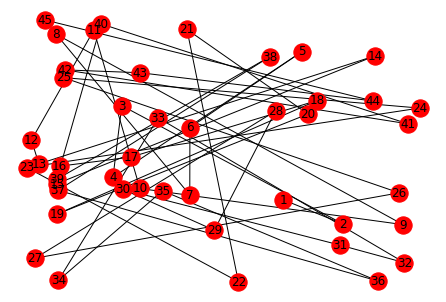

odległośc euklidesa między między podanymi wierzchołkami to: 


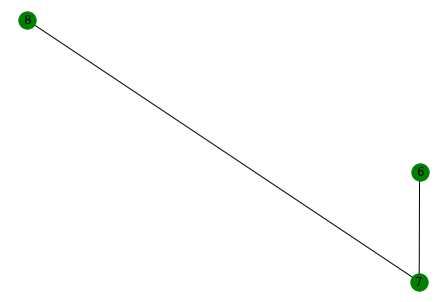

3.390379048837819


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from random import uniform, randint, seed, random
from scipy.spatial import distance
import copy


k = int(input('podaj pierwszy wierzcholek do spr: '))
j = int(input('podaj drugi wierzcholek do spr: '))

x=45
graph1 = nx.Graph()
graph1_pos = {}
graph2 = nx.Graph()
graph2_pos = {}


for i in range(x):
    x_rand = random() *6
    y_rand = random() *3
    graph1.add_node(i+1)

    if i>0:
        graph1.add_edge(i,i+1)
    graph1_pos[i+1] = [x_rand, y_rand]


nx.draw(graph1, graph1_pos, with_labels=True, node_color="red")
plt.show()


def dist(v,w):
    graph2.add_node(v)
    graph2.add_node(w)

    graph2_pos[v] = graph1_pos[v]
    graph2_pos[w] = graph1_pos[w]

    if graph1.has_edge(v,w) == True:
        graph2.add_edge(v, w)
        nx.draw(graph2, graph2_pos, with_labels=True, node_color="green")
        plt.show()
        return distance.euclidean(graph1_pos[v], graph1_pos[w])
    else:
        graph1.remove_node(v)

        if v == 1:
            D = [v+1]
            d = distance.euclidean(graph1_pos[v], graph1_pos[D[0]])
            graph2.add_edge(v, D[0])
            return dist(D[0],w) + d

        elif v == 10:
            D = [v-1]
            d = distance.euclidean(graph1_pos[v], graph1_pos[D[0]])
            graph2.add_edge(D[0], v)
            return dist(D[0], w) + d

        else:
            D = [v-1, v+1]
            graph1.add_edge(D[0],D[1])

            if w>v:
                d = distance.euclidean(graph1_pos[v], graph1_pos[D[1]])
                graph2.add_edge(v, D[1])
                return dist(D[1], w) + d

            else:
                d = distance.euclidean(graph1_pos[v], graph1_pos[D[0]])
                graph2.add_edge(v, D[0])
                return dist(D[0], w) + d

print("odległośc euklidesa między między podanymi wierzchołkami to: ")
print(dist(k,j))

## Zadanie 4

Centrach handlowe (galerie) pewnego miasta zostały zmonopolizowane tak, że zarządza nimi jeden właściciel. W każdej galerii realizowany jest szereg usług podstawowych. Aby zróżnicować usługi dostępne w każdej galerii, a tym samym, aby rozdystrybuować klientów między wieloma galeriami, każda z nich świadczy jedną usługę dodatkową. Zbiór usług dodatkowych jest ustalony i ma on liczność L. Należy zagwarantować, aby żadna sąsiadująca ze sobą galeria nie świadczyła tej samej usługi dodatkowej – w przeciwnym wypadku mamy konflikt usług i rozwiązanie jest niedopuszczalne.
Zaproponuj strukturę danych, która będzie przechowywać informacje o centrach handlowych rozmieszczonych w mieście.
Zaimplementuj algorytm rozmieszczania usług dodatkowych usl(A, B), który działa jak nastepuje:

• wybiera jedną galerię g ze zbioru A (zbiór galerii bez przydzielonych usług) i przydziela do niej jedną
usługę,

• jeśli na zbiorze galerii B powstaje konflikt usług, to wybierana jest inna usługa; jeśli nie można przy- dzielić usługi tak, aby nie doszło do konfliktu, to zwracana jest informacja o niedopuszczalności roz- wiązania,

• wywoływany jest algorytm z pomniejszonym zbiorem galerii usl(A − {g}, B); jeśli uruchomiona pod- rzędna instancja algorytmu zwróciła rozwiązanie dopuszczalne, to jest ono zwracane przez algorytm, razem usługą przydzieloną w pierwszym punkcie.

Algorytm jest uruchamiany wywołaniem usl(A, A), gdzie A to zbiór wszystkich galerii.

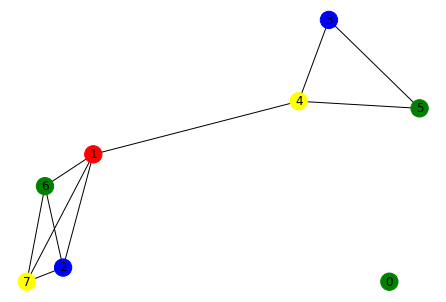

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import numpy as np
import math

howManyGaleries = 8
G = nx.Graph()
Gpos = {}
L = ['l1', 'l2', 'l3', 'l4']
mainA = []
mainB = {}
neighborDistans = 40
color_map = []

def usl(A, B):
    g = random.choice(A)
    gL = random.choice(L)
    neighbors = []
    for elemA in fullMainA:
        xg, yg, xElem, yElem = Gpos[g][0], Gpos[g][1], Gpos[elemA][0], Gpos[elemA][1]
        label = np.sqrt((xg - xElem) ** 2 + (yg - yElem) ** 2)
        if elemA == g:
            label = 100
        if label < neighborDistans and elemA in B:
            neighbors.append(elemA)
    if len(neighbors) is not 0:
        leftL = L.copy()
        for neighbor in neighbors:
            G.add_weighted_edges_from([(g, neighbor, '')])
            if B[neighbor] is not gL:
                if B[neighbor] in leftL:
                    try:
                        leftL.remove(B[neighbor])
                    except IndexError:
                        print('Brak dopuszczalnego rozwiązania')

            if B[neighbor] == gL:
                try:
                    leftL.remove(gL)
                    gL = random.choice(leftL)
                except IndexError:
                  print('Brak dopuszczalnego rozwiązania')
        mainB[g] = gL
    else:
        mainB[g] = gL

    mainA.remove(g)

    if len(mainA) is not 0:
        usl(mainA, mainB)

for x in range(howManyGaleries):
    G.add_node(x)

for node in G.nodes():
    value = [random.randint(0,101), random.randint(0,101)]
    Gpos[node] = value

for elem in G.nodes():
    mainA.append(elem)
fullMainA = mainA.copy()

usl(mainA, mainB)


if len(mainA) == 0:
    for node in G:
        if mainB[node] == 'l1':
            color_map.append('blue')
        if mainB[node] == 'l2':
            color_map.append('red')
        if mainB[node] == 'l3':
            color_map.append('yellow')
        if mainB[node] == 'l4':
            color_map.append('green')

nx.draw(G, Gpos, with_labels=True, node_color=color_map)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, Gpos, edge_labels=labels)
plt.show()


## Zadanie 5

Na interesujący geologicznie obszar została nałożona (wirtualna) siatka potencjalnych lokalizacji odwiertów. Siatka ma rozmiary N × K, gdzie odległość między kolejnymi punktami siatki w pionie i w poziomie to D metrów. Ze względu na poglądowy charakter tych badań geologicznych jest istotne, aby odwierty nie odbywały się zbyt gęsto, co pozwoli na uniknięcie nadmiernego duplikowania rezultatów. Konkretnie, warto wykonywać odwierty w punktach siatki odległych od siebie o przynajmniej S metrów. Z drugiej strony, wykonanie odwiertów jest kosztowne, a ich maksymalna liczba przewidziana w budżecie inwestycji to R.
Napisz program, który dla ustalonych N, K, D, S, R wyznaczy plan prac geologicznych tak, aby maksy- malizować liczbę faktycznie zaplanowanych odwiertów przy zachowaniu wspomnianych ograniczeń. Program uruchom dla przykładowych danych, a rezultat przedstaw w sposób graficzny (generowany automatycznie, w programie).

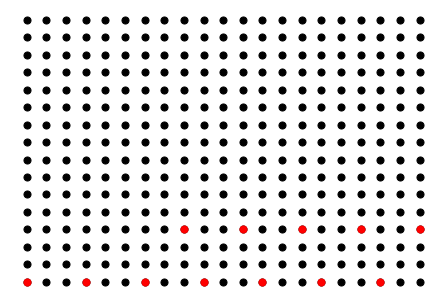

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import math

# width
N = 200 
# height
K = 150 
# distance in V and H
D = 10  
# minimal distance between drills
S = 25
# max numbers of drills
R = 12

G = nx.Graph()
H = nx.Graph()
VxPoints = np.arange(0, N+1, D)
VyPoints = np.arange(0, K+1, D)
nodes_number = math.floor(len(VxPoints) * len(VyPoints))
Gpos = {}
Hpos = {}
true_false = True
x_index = 0
y_index = 0
nodes_array = []

def drillsPositions():
    true_false = True
    rows_number = 1
    for node in H.nodes():
        if node == 0:
            x_pos, y_pos = 0, 0
            Hpos[node] = [x_pos, y_pos]
        else:
            y_pos = Hpos[node - 1][1]
            if true_false:
                x_pos = Hpos[node - 1][0] + S
                while x_pos % D is not 0:
                    x_pos += 1
                if x_pos > N:
                    true_false = False
                    rows_number += 1
                    x_pos = N
                    y_pos += S
                    while y_pos % D is not 0:
                        y_pos += 1
            else:
                x_pos = Hpos[node - 1][0] - S
                while x_pos % D is not 0:
                    x_pos -= 1
                if x_pos < 0:
                    true_false = True
                    rows_number += 1
                    x_pos = 0
                    y_pos += S
                    while y_pos % D is not 0:
                        y_pos += 1
            if y_pos > K:
                print("error")
            Hpos[node] = [x_pos, y_pos]

for node in range(nodes_number):
    G.add_node(node)
    x = VxPoints[x_index]
    y = VyPoints[y_index]
    x_index += 1
    if x_index == len(VxPoints):
        x_index = 0
        y_index += 1
    Gpos[node] = [x, y]

for h in range(R):
    H.add_node(h)

for node in H.nodes():
    nodes_array.append(node)

drillsPositions()

nx.draw(G, Gpos, node_size = 50, with_labels=False, node_color='black')
nx.draw(H, Hpos, node_size = 50, with_labels=False, node_color='red')
plt.show()
